# Лабораторная работа №5

Выполнила Рындина Валерия, M33351

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

seed = 0

## Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта

In [26]:
dt_cases = pd.read_csv('data/raw/Case.csv')
dt_cases.head(5)

,Unnamed: 0,Unnamed: 0.1,case_id,province,city,group,infection_case,confirmed,latitude,longitude,distance,confirmedGroup,new_id
0,0,0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,142.126011,2,1
1,1,1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.482080,126.901384,136.334471,2,2
2,2,2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,139.357961,2,3
3,3,3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,143.633209,2,4
4,4,4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,157.698988,2,5


In [27]:
X = dt_cases[['latitude', 'longitude', 'new_id', 'group']]
y = dt_cases['confirmedGroup']

In [28]:
tsne = TSNE(n_components = 2, random_state = seed, n_jobs = 4)
X_reduced = tsne.fit_transform(X)

/home/valrun/Repositories/CT-19/5 sem/pythonProject/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/valrun/Repositories/CT-19/5 sem/pythonProject/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Projecting 4-dimensional data to 2D


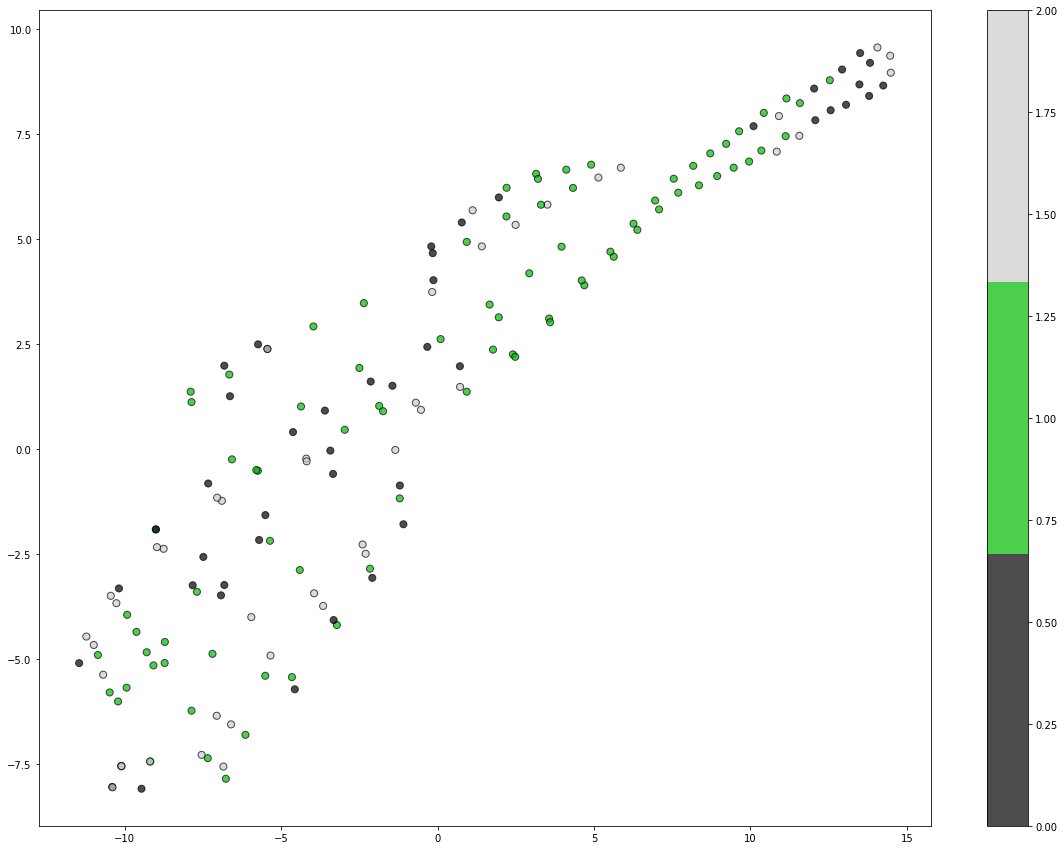

In [40]:
def draw(m_x, m_y):
    plt.figure(figsize=(20,15))
    plt.scatter(m_x[:, 0], m_x[:, 1], c = m_y,
                edgecolor = 'k', alpha = 0.7, s = 50,
                cmap = plt.cm.get_cmap('nipy_spectral', 3))
    plt.colorbar()
    plt.show()

print('Projecting %d-dimensional data to 2D' % X.shape[1])
draw(X_reduced, y)

2. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции

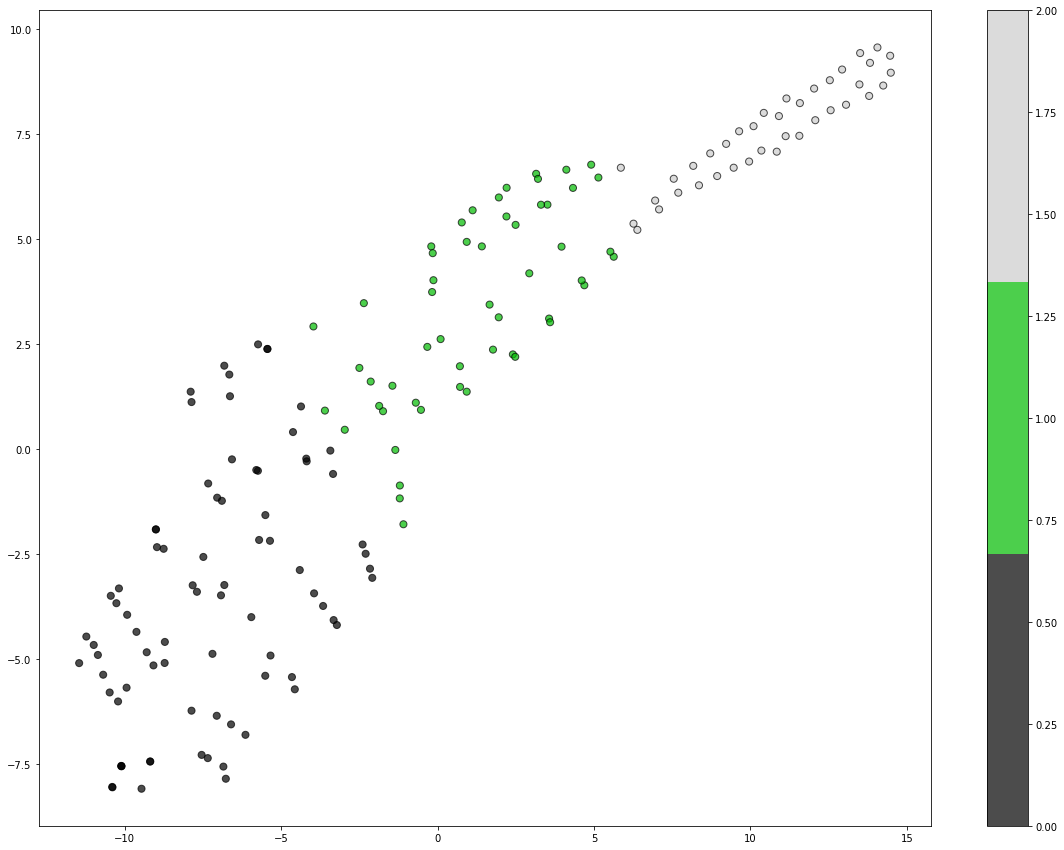

In [36]:
y_pred = KMeans(n_clusters = 3, random_state = seed, algorithm = 'full').fit_predict(X_reduced)
draw(X_reduced, y_pred)

Формулы для расчёта.

In [32]:
import math

def count_dots_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def count_distance(x, y, inner):
    number = 0
    distance = 0
    size = len(y)
    for i in range(size):
        for j in range(i + 1, size):
            if inner and y[i] == y[j]:
                distance += count_dots_distance(x[i][0], x[i][1], x[j][0], x[j][1])
                number += 1
            elif not inner and y[i] != y[j]:
                distance += count_dots_distance(x[i][0], x[i][1], x[j][0], x[j][1])
                number += 1
    return distance / number

In [33]:
inner = count_distance(X_reduced, y_pred, True)
inter = count_distance(X_reduced, y_pred, False)

print("Внутренее расстояние", inner)
print("Внешнее расстояние", inter)
print("Частное ", inner / inter)

Внутренее расстояние 4.474121981911713
Внешнее расстояние 14.280206449766538
Частное  0.3133093346829631


3. Опишите результаты